In [1]:
# mount gdrive and unzip data
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
import sys
import os 
workingdir = '/content/gdrive/My Drive/Colab Notebooks/EVA4/Session12'
sys.path.append(workingdir)

In [3]:
import numpy as np
import pandas as pd
import json
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [5]:
#Read COCO JSON File
fptr = open('/content/gdrive/My Drive/Colab Notebooks/EVA4/Session12/via_export_coco_new.json')
data = json.load(fptr)
print(data.keys())

dict_keys(['info', 'images', 'annotations', 'licenses', 'categories'])


In [6]:
#Extract Details
images_df = pd.DataFrame(data['images'], columns = data['images'][0].keys())
annotations_df = pd.DataFrame(data['annotations'], columns = data['annotations'][0].keys())

In [7]:
images_df.head()

,id,width,height,file_name,license,date_captured
0,0,275,183,img001.jpg,1,
1,1,259,194,img002.jpg,1,
2,2,201,251,img003.jpg,1,
3,3,251,201,img004.jpg,1,
4,4,279,181,img005.jpg,1,


In [8]:
annotations_df.head()

,id,image_id,segmentation,area,bbox,iscrowd
0,0,0,"[91, 6, 214, 6, 214, 178, 91, 178]",21156,"[91, 6, 123, 172]",0
1,1,1,"[26, 13, 187, 13, 187, 188, 26, 188]",28175,"[26, 13, 161, 175]",0
2,2,2,"[42, 35, 150, 35, 150, 244, 42, 244]",22572,"[42, 35, 108, 209]",0
3,3,3,"[37, 36, 195, 36, 195, 180, 37, 180]",22752,"[37, 36, 158, 144]",0
4,4,4,"[13, 5, 106, 5, 106, 179, 13, 179]",16182,"[13, 5, 93, 174]",0


In [9]:
#Extract the Box Dimensions
dogs_df = pd.concat([images_df, annotations_df], 1)[['file_name', 'width', 'height', 'bbox']]
x_list = []
y_list = []
w_list = []
h_list = [] 
for row in range(dogs_df.shape[0]):
  x = dogs_df['bbox'][row][0]
  y = dogs_df['bbox'][row][1]
  w = dogs_df['bbox'][row][2]
  h = dogs_df['bbox'][row][3]
  x_list.append(x)
  y_list.append(y)
  w_list.append(w)
  h_list.append(h)
box_df = pd.DataFrame(list(zip(x_list, y_list, w_list, h_list)), columns =['x', 'y', 'box_width', 'box_height'])
dogs_df = pd.concat([dogs_df, box_df], 1)
dogs_df = dogs_df.drop('bbox', axis =1)

In [10]:
dogs_df.head()

,file_name,width,height,x,y,box_width,box_height
0,img001.jpg,275,183,91,6,123,172
1,img002.jpg,259,194,26,13,161,175
2,img003.jpg,201,251,42,35,108,209
3,img004.jpg,251,201,37,36,158,144
4,img005.jpg,279,181,13,5,93,174


In [11]:
#Normalize the Box Dimensions based on Image Height and Width
dogs_df['x'] = dogs_df['x'] / dogs_df['width']
dogs_df['y'] = dogs_df['y'] / dogs_df['height']
dogs_df['box_width'] = dogs_df['box_width'] / dogs_df['width']
dogs_df['box_height'] = dogs_df['box_height'] / dogs_df['height']

In [12]:
dogs_df.head()

,file_name,width,height,x,y,box_width,box_height
0,img001.jpg,275,183,0.330909,0.032787,0.447273,0.939891
1,img002.jpg,259,194,0.100386,0.067010,0.621622,0.902062
2,img003.jpg,201,251,0.208955,0.139442,0.537313,0.832669
3,img004.jpg,251,201,0.147410,0.179104,0.629482,0.716418
4,img005.jpg,279,181,0.046595,0.027624,0.333333,0.961326


In [13]:
hw_array = dogs_df[["box_width", "box_height"]].to_numpy()

In [14]:
hw_array.shape

(50, 2)

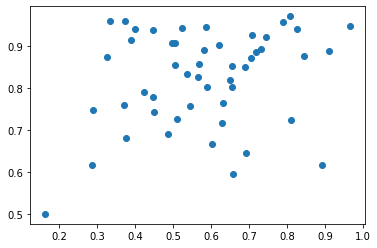

In [15]:
plt.scatter(hw_array[:,0], hw_array[:,1])

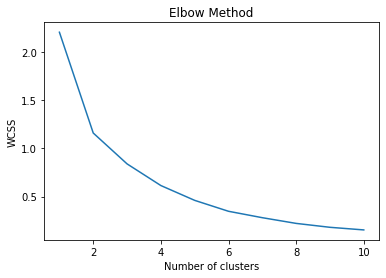

In [16]:
#Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(hw_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

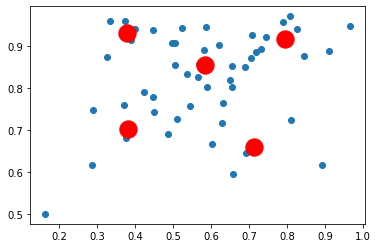

In [17]:
#Determine the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(hw_array)
plt.scatter(hw_array[:,0], hw_array[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()